In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/dataset/MS-Final_DRAFT.csv",encoding="cp1252")
df.head()

,Undergrade CGPA,IELTS/TOEFL,GRE,Conference Paper,Journal Paper,University Class
0,3.98,120,0,1,0,C
1,3.98,120,0,1,0,A
2,3.98,120,0,1,0,C
3,3.98,120,0,1,0,D
4,3.98,120,0,1,0,C


In [ ]:
df.describe()

,Undergrade CGPA,IELTS/TOEFL,GRE,Conference Paper,Journal Paper
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,3.471188,100.570881,278.835249,1.486590,0.574713
std,0.259931,10.529800,95.605800,2.165466,1.084494
min,2.980000,0.000000,0.000000,0.000000,0.000000
25%,3.250000,93.000000,304.000000,0.000000,0.000000
50%,3.490000,101.000000,310.000000,1.000000,0.000000
75%,3.640000,108.000000,316.000000,2.000000,1.000000
max,4.000000,120.000000,337.000000,13.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Undergrade CGPA   261 non-null    float64
 1   IELTS/TOEFL       261 non-null    int64  
 2   GRE               261 non-null    int64  
 3   Conference Paper  261 non-null    int64  
 4   Journal Paper     261 non-null    int64  
 5   University Class  261 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.4+ KB


In [ ]:
df.isnull().sum()

Undergrade CGPA     0
IELTS/TOEFL         0
GRE                 0
Conference Paper    0
Journal Paper       0
University Class    0
dtype: int64

Text(0, 0.5, 'Number')

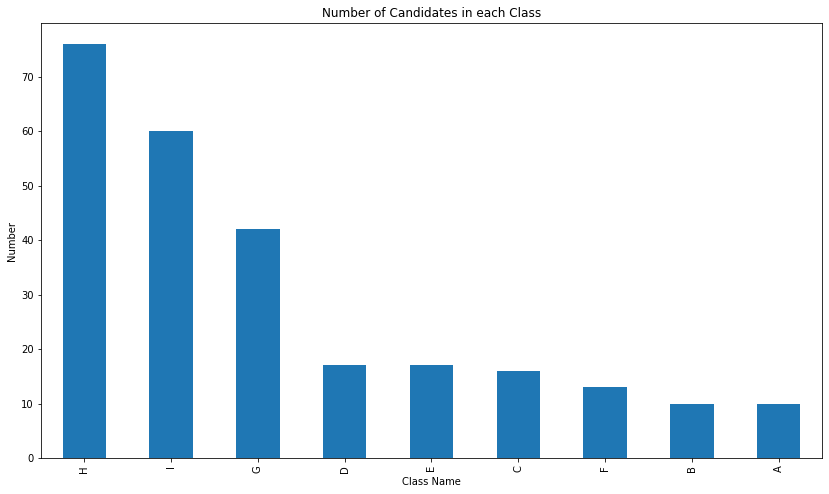

In [ ]:
ax = df['University Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Candidates in each Class")
ax.set_xlabel("Class Name")
ax.set_ylabel("Number")

In [ ]:
df['University Class'].value_counts()

H    76
I    60
G    42
E    17
D    17
C    16
F    13
B    10
A    10
Name: University Class, dtype: int64

Relplotting

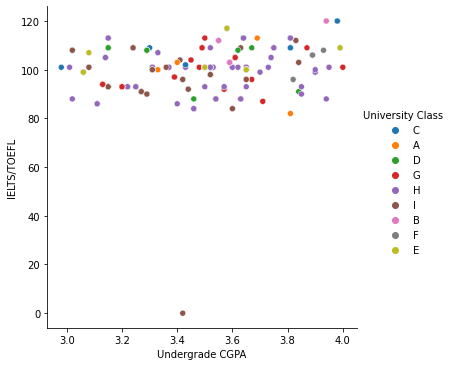

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="IELTS/TOEFL", hue="University Class")

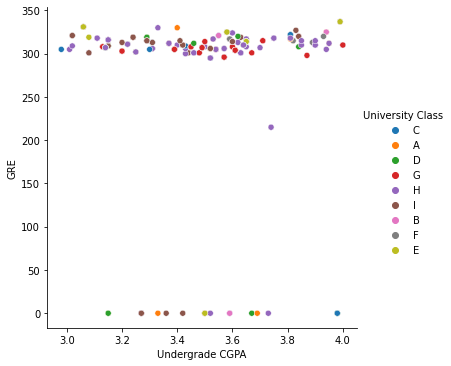

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="GRE", hue="University Class")

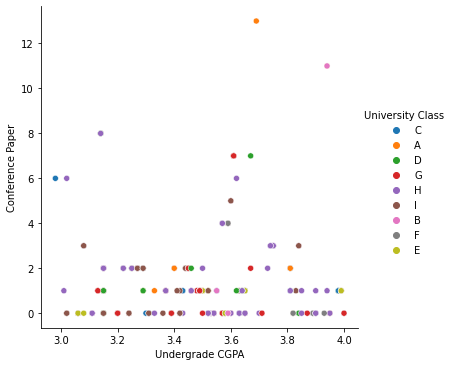

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Conference Paper", hue="University Class")

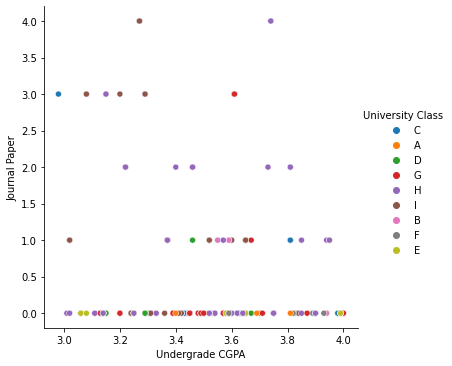

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Journal Paper", hue="University Class")

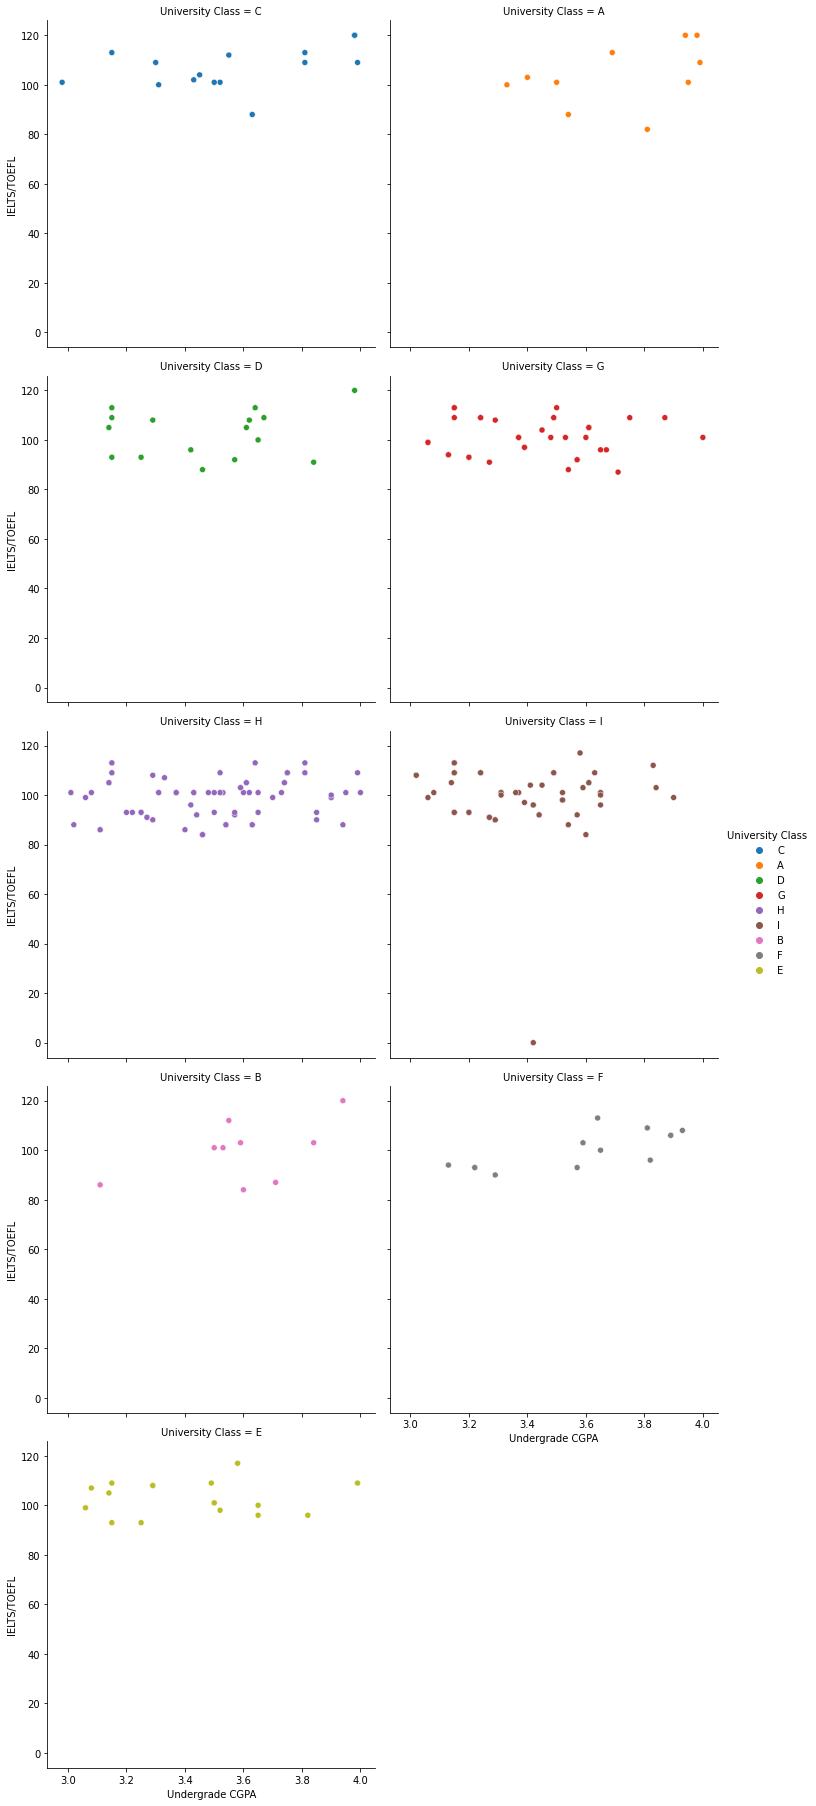

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="IELTS/TOEFL", hue="University Class", col="University Class", col_wrap=2)

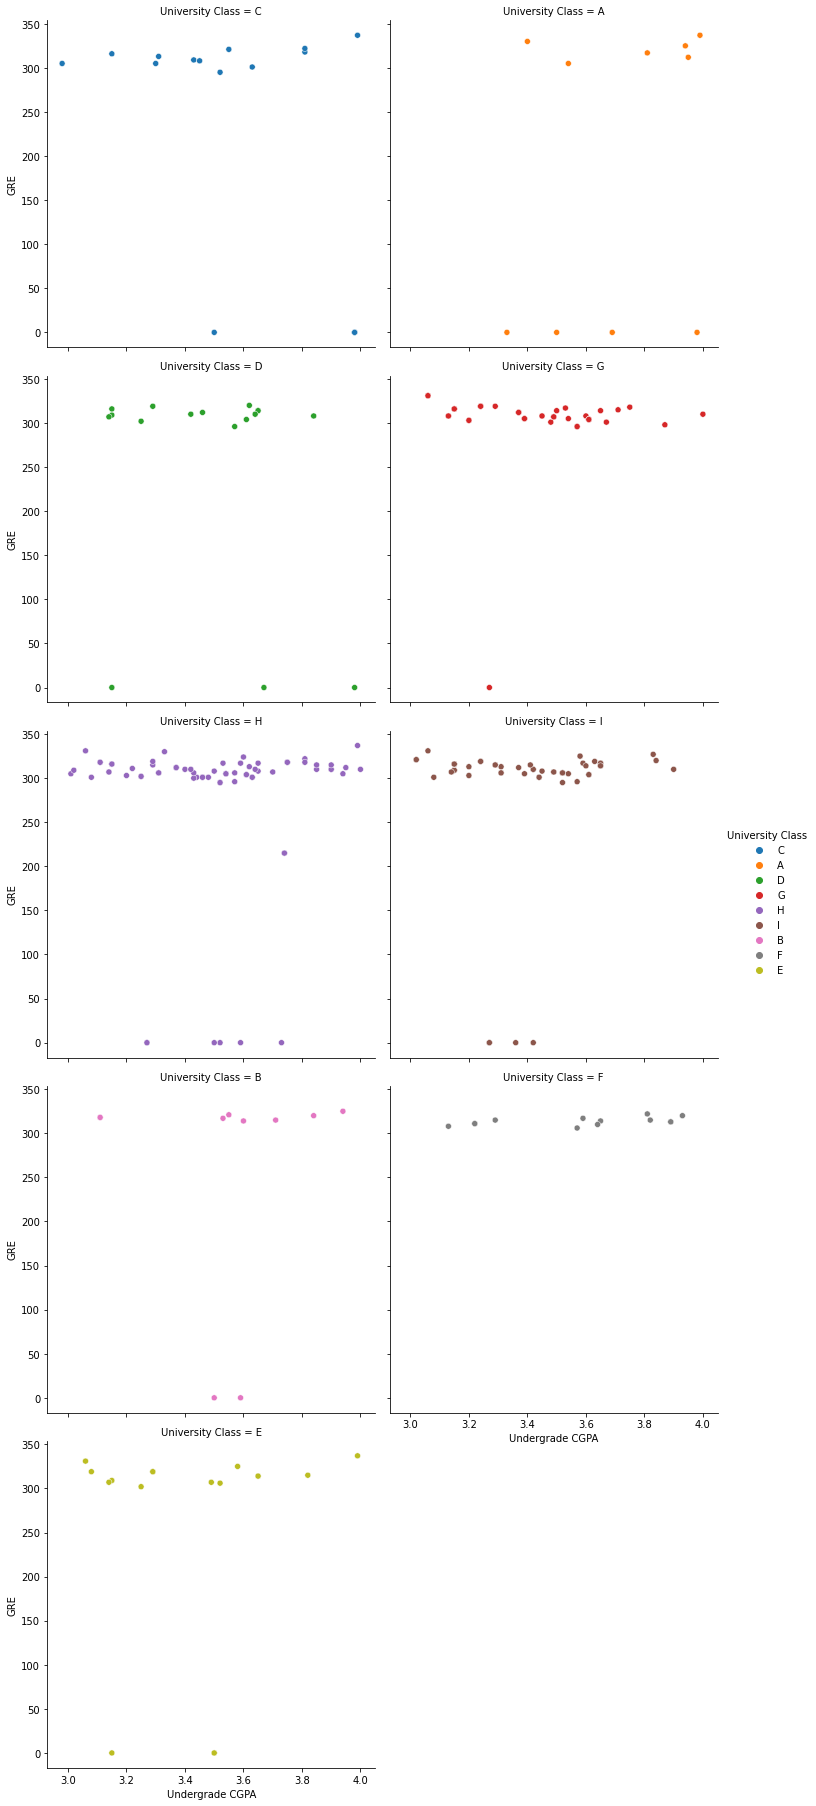

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="GRE", hue="University Class", col="University Class", col_wrap=2)

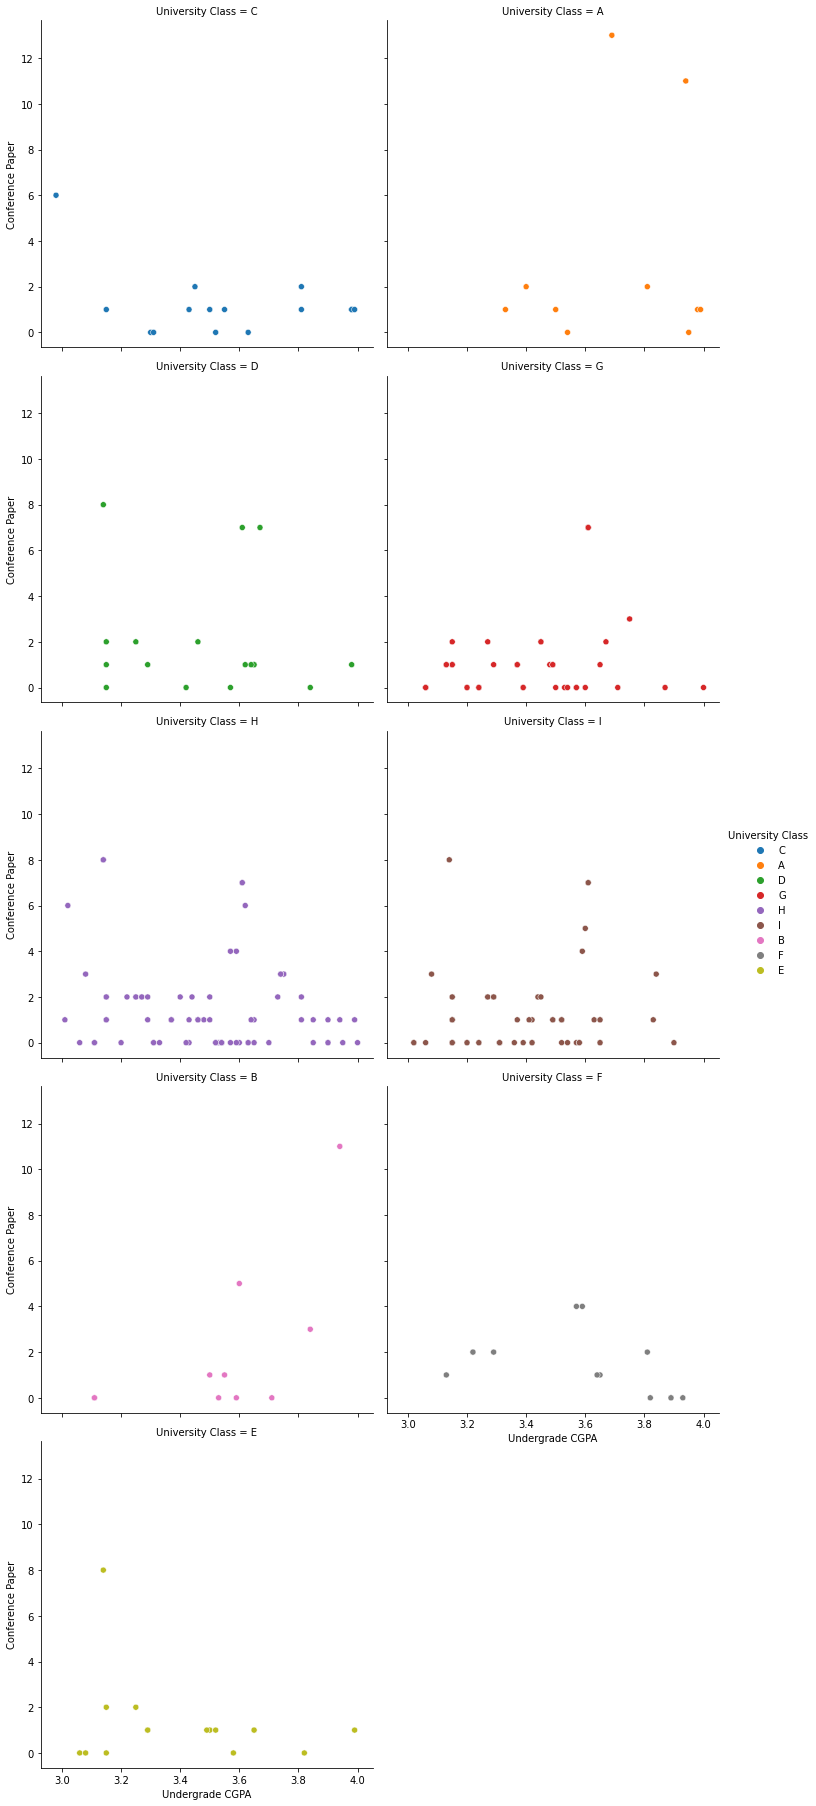

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Conference Paper", hue="University Class", col="University Class", col_wrap=2)

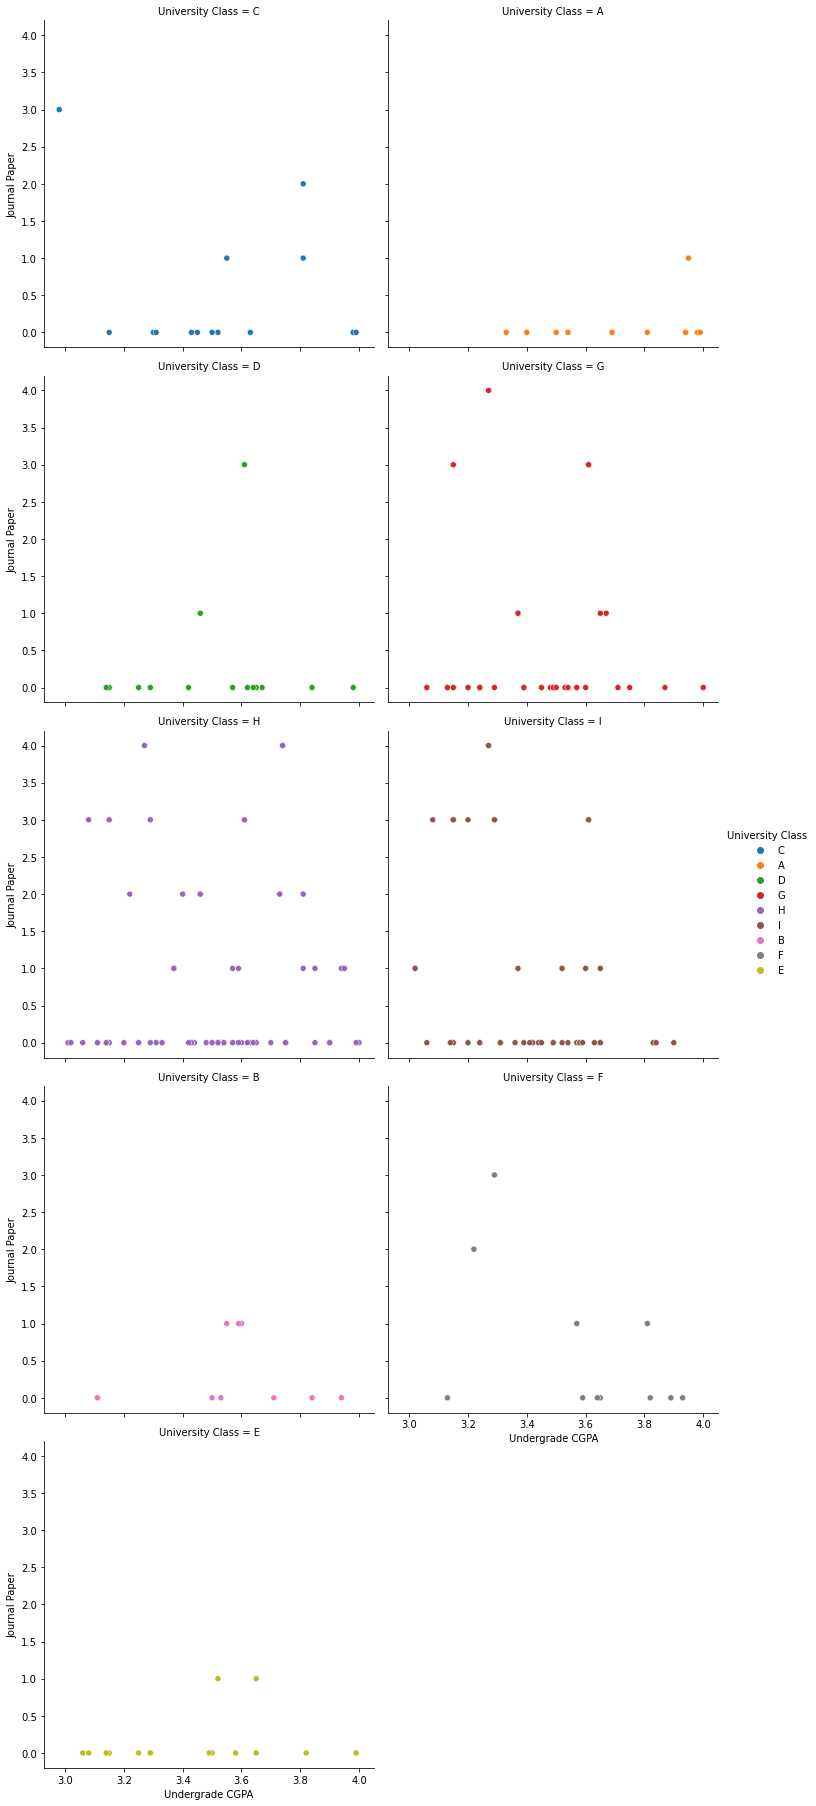

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Journal Paper", hue="University Class", col="University Class", col_wrap=2)

In [ ]:
df.head()

,Undergrade CGPA,IELTS/TOEFL,GRE,Conference Paper,Journal Paper,University Class
0,3.98,120,0,1,0,C
1,3.98,120,0,1,0,A
2,3.98,120,0,1,0,C
3,3.98,120,0,1,0,D
4,3.98,120,0,1,0,C


Regression Plot

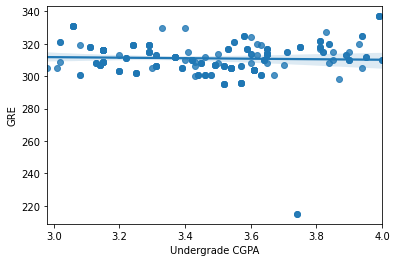

In [ ]:
df_gre = df[df["GRE"]>1 ]
sns.regplot(data=df_gre, x="Undergrade CGPA", y="GRE")

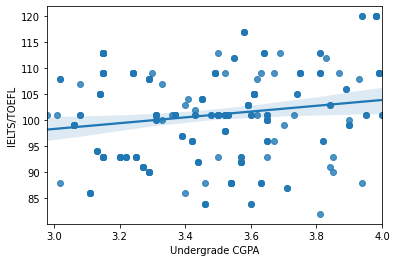

In [ ]:
df_gre = df[df["IELTS/TOEFL"]>1 ]
sns.regplot(data=df_gre, x="Undergrade CGPA", y="IELTS/TOEFL")

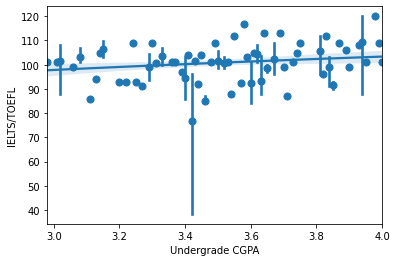

In [ ]:
ax = sns.regplot(x="Undergrade CGPA", y="IELTS/TOEFL", data=df,
                 x_estimator=np.mean, logx=True)

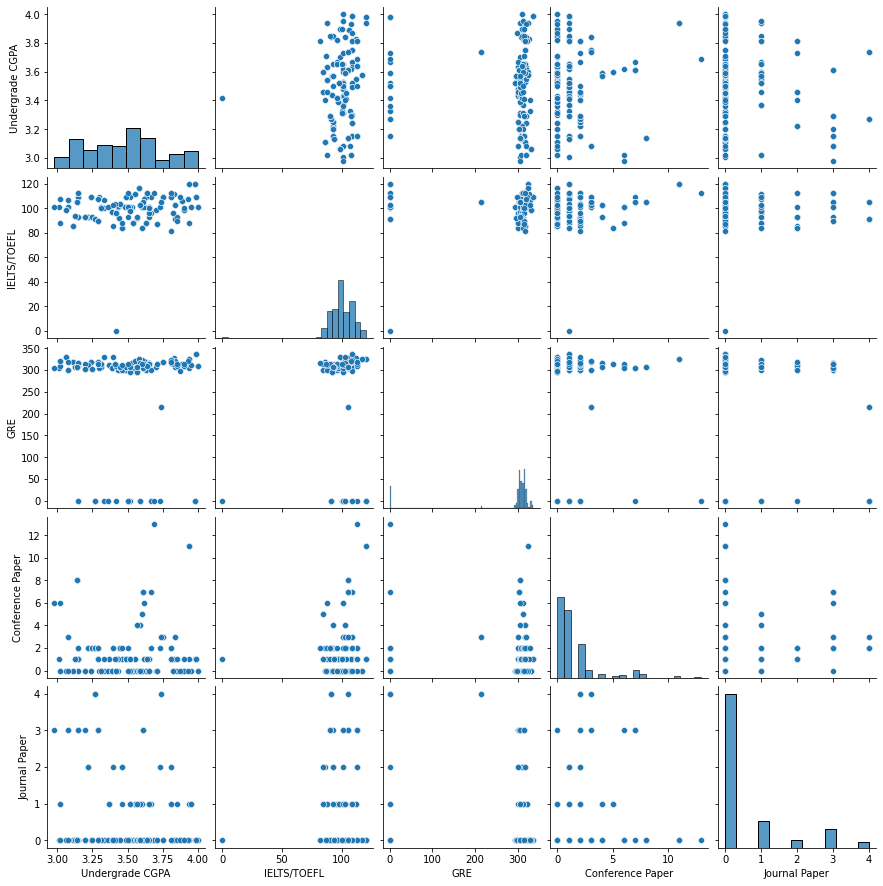

In [ ]:
sns.pairplot(df)

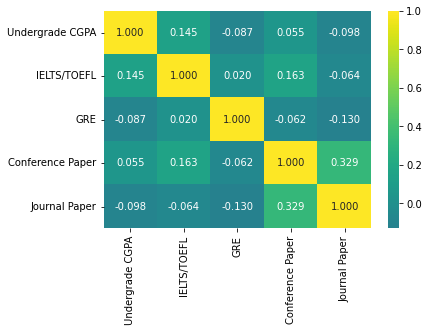

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Undergrade CGPA',
             'IELTS/TOEFL','GRE',
             'Conference Paper','Journal Paper']

features_tf = pd.DataFrame(data=df)
features_tf[numerical] = scaler.fit_transform(features_tf[numerical])
features_tf.head(20)

,Undergrade CGPA,IELTS/TOEFL,GRE,Conference Paper,Journal Paper,University Class
0,0.980392,1.000000,0.000000,0.076923,0.00,C
1,0.980392,1.000000,0.000000,0.076923,0.00,A
2,0.980392,1.000000,0.000000,0.076923,0.00,C
3,0.980392,1.000000,0.000000,0.076923,0.00,D
4,0.980392,1.000000,0.000000,0.076923,0.00,C
5,0.382353,0.841667,0.925816,0.076923,0.25,G
6,0.382353,0.841667,0.925816,0.076923,0.25,G
7,0.382353,0.841667,0.925816,0.076923,0.25,H
8,0.382353,0.841667,0.925816,0.076923,0.25,I
9,0.382353,0.841667,0.925816,0.076923,0.25,H


In [ ]:
data = features_tf.iloc[:,1:].values
labels = features_tf['University Class']
features_tf = features_tf.drop(columns=['University Class'])

In [ ]:
labels.head()

0    C
1    A
2    C
3    D
4    C
Name: University Class, dtype: object

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state = 123)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_over, y_over = oversampling.fit_resample(features_tf,labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_over = pd.DataFrame(X_over, columns=features_tf.columns)
y_over = pd.DataFrame(y_over)
y_over.value_counts()

I    76
H    76
G    76
F    76
E    76
D    76
C    76
B    76
A    76
dtype: int64

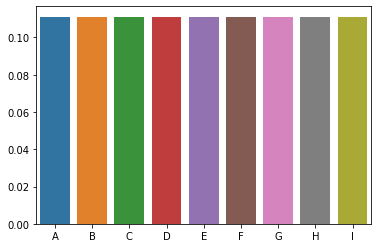

In [ ]:
sns.barplot(x=["A","B","C","D","E","F","G","H","I"], y=y_over.value_counts(normalize=True))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_over,y_over, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(513, 5) (171, 5) (513, 1) (171, 1)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = model.predict(x_train)


In [ ]:
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)

F1-score% = 84.9671320396951 | Accuracy% = 85.57504873294347


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           A       0.98      0.95      0.97        63
           B       0.91      0.97      0.94        61
           C       0.89      0.93      0.91        59
           D       0.86      0.91      0.89        56
           E       0.84      0.89      0.86        54
           F       0.93      0.93      0.93        57
           G       0.78      0.77      0.78        52
           H       0.66      0.61      0.63        54
           I       0.78      0.70      0.74        57

    accuracy                           0.86       513
   macro avg       0.85      0.85      0.85       513
weighted avg       0.85      0.86      0.85       513



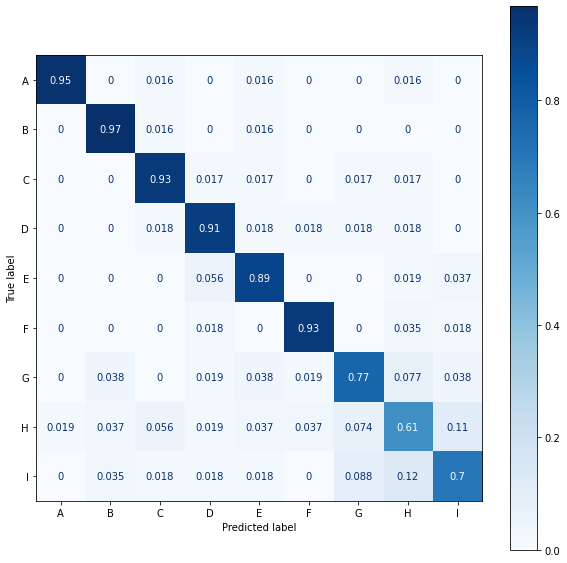

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, preds, labels=df['University Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

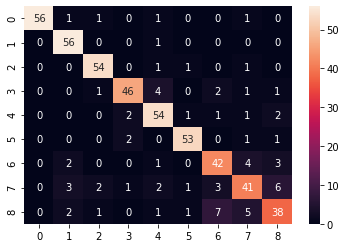

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

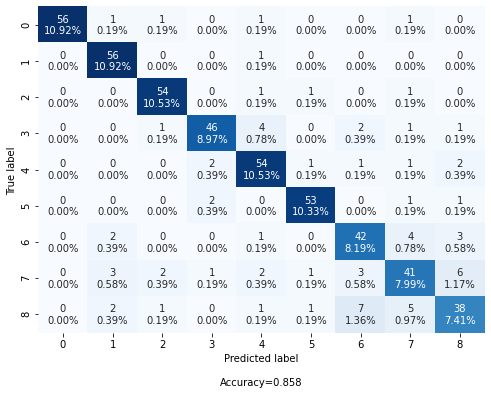

In [ ]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# LGBM Model

In [ ]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
preds =lgbmc.predict(x_train)


In [ ]:
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)

F1-score% = 85.57134720198766 | Accuracy% = 85.7699805068226


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           A       1.00      0.93      0.97        60
           B       0.89      0.96      0.92        57
           C       0.93      0.95      0.94        57
           D       0.96      0.80      0.87        55
           E       0.84      0.89      0.86        61
           F       0.90      0.95      0.92        57
           G       0.73      0.87      0.79        52
           H       0.75      0.68      0.71        59
           I       0.73      0.69      0.71        55

    accuracy                           0.86       513
   macro avg       0.86      0.86      0.86       513
weighted avg       0.86      0.86      0.86       513



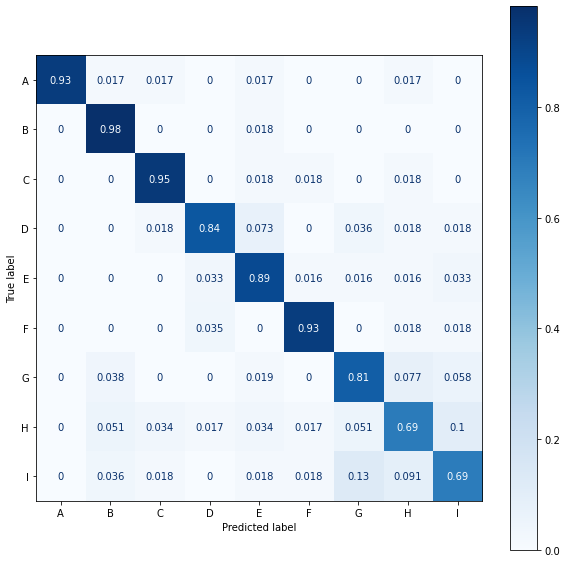

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, preds, labels=df['University Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_train,preds)
print(cf_matrix)

[[56  1  1  0  1  0  0  1  0]
 [ 0 55  0  0  1  0  1  0  0]
 [ 0  0 54  0  1  0  0  1  1]
 [ 0  0  1 44  4  1  2  2  1]
 [ 0  0  0  1 54  1  2  2  1]
 [ 0  0  1  1  0 54  0  0  1]
 [ 0  1  0  0  1  0 45  3  2]
 [ 0  3  1  0  1  3  3 40  8]
 [ 0  2  0  0  1  1  9  4 38]]


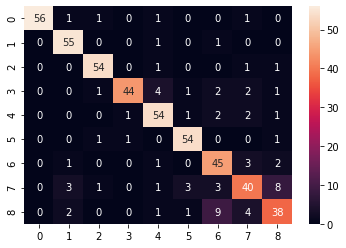

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
predss =ET.predict(x_train)


In [ ]:
print('F1-score% =', f1_score(y_train, predss, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, predss)*100)

F1-score% = 84.74470695677834 | Accuracy% = 85.57504873294347


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predss))

              precision    recall  f1-score   support

           A       0.98      0.95      0.97        63
           B       0.90      0.98      0.94        61
           C       0.85      0.95      0.90        59
           D       0.86      0.91      0.89        56
           E       0.83      0.91      0.87        54
           F       0.93      0.93      0.93        57
           G       0.74      0.83      0.78        52
           H       0.70      0.57      0.63        54
           I       0.86      0.63      0.73        57

    accuracy                           0.86       513
   macro avg       0.85      0.85      0.85       513
weighted avg       0.85      0.86      0.85       513



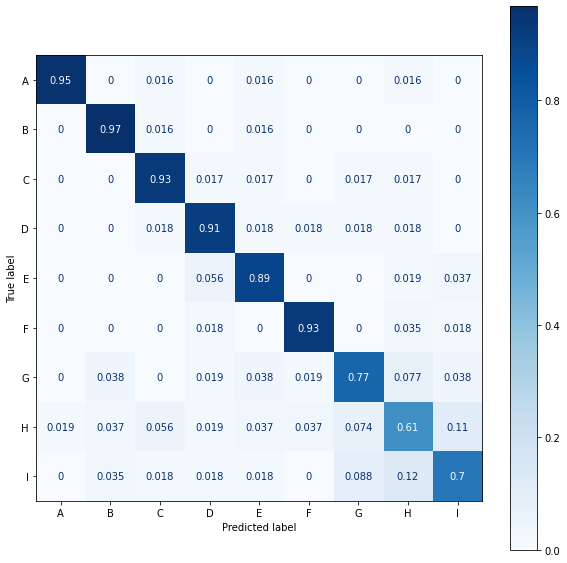

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_train, preds, labels=df['University Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_train, y_train, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_train,preds)
print(cf_matrix)

[[58  0  0  0  1  0  0  1  0]
 [ 1 55  0  0  1  0  0  0  0]
 [ 1  0 54  0  1  0  0  1  0]
 [ 0  0  1 50  1  0  1  1  1]
 [ 0  0  0  5 52  0  2  1  1]
 [ 0  0  1  2  1 52  0  0  1]
 [ 0  2  0  1  1  0 43  4  1]
 [ 0  3  2  2  1  2  3 42  4]
 [ 0  2  1  1  1  1  8  7 34]]


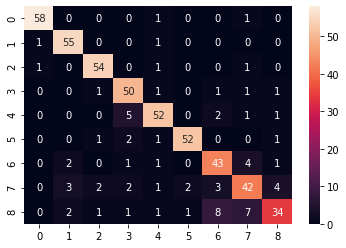

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)